Quantum Teleportation Protocol

based on https://qiskit.org/textbook/ch-algorithms/teleportation.html#how

Here we will implement the quantum teleporation protocol that allows for sending a quantum state between two parties by means of two classical bits,given that an entangled state has been prepared and shared among the sending and receiving party.First, let us load all required libs.


In [21]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from mpl_toolkits.mplot3d import Axes3D
#from qiskit_textbook.tools import random_state

Now we can start by defining the quantum circuit with three qubits

In [22]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx) # assemble circuit

Let's again define a function to create a Bell state

In [23]:
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

Now we can prepare the Bell state(see step a)

In [24]:
create_bell_pair(teleportation_circuit,1,2)

As discussed in class,next qubit 1 is sent to Alice and qubit 2 is sent to Bob (step b)).
Next,Alice has to perform a controlled not followed by a Hadamard applied to the qubit holding her original state.

In [25]:
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)

Now that we have defined Alice's gates, we can add those to the teleportation circuit. We will also add a barrier to seperate off the different steps of the protocol, but as before, note that those barriers are only for ease of reading and they do not have any implication.

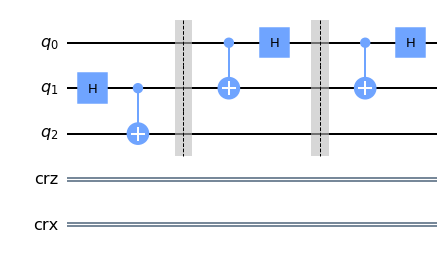

In [27]:
teleportation_circuit.barrier()
alice_gates(teleportation_circuit,0,1)
teleportation_circuit.draw('mpl')

In [ ]:
def  measure_and_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
    

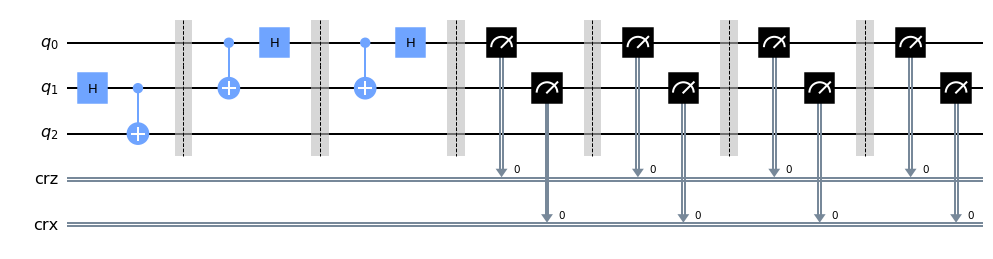

In [32]:
measure_and_send(teleportation_circuit,0,1)
teleportation_circuit.draw('mpl')

with the classical information being send to Bobi we can now apply the necessary corrections(if applcable).See step e) in class discussion.

In [37]:
def bob_gates(qc,qubit,ciz,cix):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

With Bob's gates on place, we can complete the circuit.

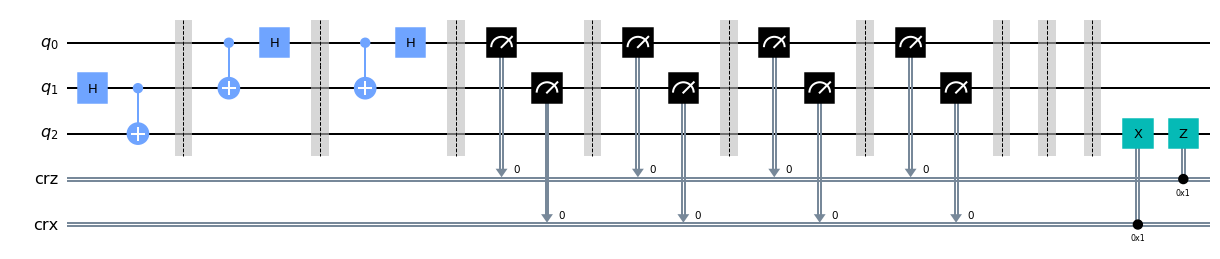

In [39]:
teleportation_circuit.barrier()
bob_gates(teleportation_circuit,2,crz,crx)
teleportation_circuit.draw('mpl')

now we can start simulating the protocol.We beed  a state sdfds for Alice.

<IPython.core.display.Latex object>

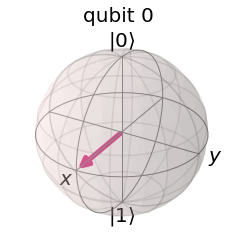

In [40]:
import math
psi = [1./math.sqrt(2),1./math.sqrt(2)]
# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)


In [41]:
init_gate = Initialize(psi)
init_gate.label = "init"

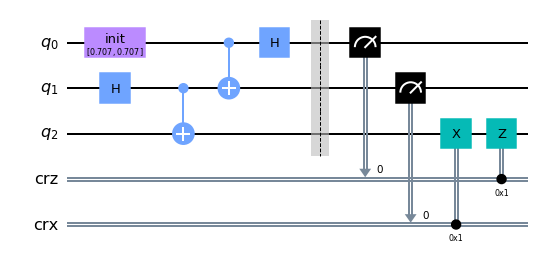

In [42]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
#qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
#qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')

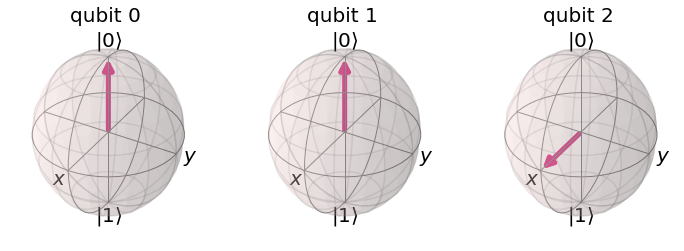

In [44]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)